In [1]:
import sys

sys.path.append("/home/mvondrak/work/PaperQPAC2/qpac/")
from qpac.descriptors import quipSOAP
from qpac.kernel import *
from qpac.utils import *
from qpac.kQEq import kernel_qeq
from qpac.GAP import GAP
from qpac.MLmodel import MLmodel
from qpac.utils_plots import plot_basics
from ase.units import Hartree
from ase.io import read, write
import numpy as np
import random

aEs = {"H":-13.641637275,"O":-2043.796858679}

molsNeut = read("xtbneut100.xyz@:",format="extxyz")
molsPos  = read("xtbpos100.xyz@:",format="extxyz")
molsNeg = read("xtbneg100.xyz@:",format="extxyz")

In [18]:
train_set = molsNeut[:50]

In [19]:
soap_desctipor1 = quipSOAP(STRsoap="soap cutoff=3.0 l_max=5 n_max=6 atom_sigma=0.5 normalize=T n_species=2 species_Z={1 8} n_Z=2 Z={1 8}", species=["H","O"])
soap_desctipor2 = quipSOAP(STRsoap="soap cutoff=2.4 l_max=6 n_max=8 atom_sigma=0.4 normalize=T n_species=2 species_Z={1 8} n_Z=2 Z={1 8}", species=["H","O"])
# soap_desctipor = quipSOAP(STRsoap="soap cutoff=3.0 l_max=5 n_max=6 atom_sigma=0.5 normalize=T n_species=2 species_Z={1 8} n_Z=2 Z={1 8}", species=["H","O"])

qpac_kernel = qpacKernel(Descriptors=[soap_desctipor1,soap_desctipor2],
                         training_set=train_set,
                         training_set_charges=[a.info["total_charge"] for a in train_set],
                         sparse = True,
                         perEl = True,
                         calc_train_derivatives=True,
                         sparse_method = "CUR",
                         sparse_count=1000)


Computing training descriptors for for descriptor number 0
Computing training descriptors for for descriptor number 1
Starting CUR decomposition for each element (final number of sparse points will be number of species * sparse_count)


In [20]:
qpac_gap = GAP(Kernel=qpac_kernel)

Computed kernel for training


Kernel is done


In [21]:
n_ats = 0
for a in train_set:
    print(len(a))
    n_ats += len(a)
print(n_ats)
print(3*n_ats)

24
21
21
30
30
30
30
30
24
33
30
30
30
30
33
30
33
27
27
30
33
27
21
30
24
30
30
27
24
33
33
21
21
27
33
33
30
33
30
30
21
24
27
33
27
30
30
33
30
33
1431
4293


In [22]:
qpac_gap.train(targets = ["energy","forces"], 
                target_sigmas = [0.0000001,0.001], 
                energy_keyword="dft_energy",
                forces_keyword="dft_forces",
                atom_energy=aEs)

Ks (2, 24, 1431)
LK (1, 2862)
Ks (2, 21, 1431)
LK (1, 2862)
Ks (2, 21, 1431)
LK (1, 2862)
Ks (2, 30, 1431)
LK (1, 2862)
Ks (2, 30, 1431)
LK (1, 2862)
Ks (2, 30, 1431)
LK (1, 2862)
Ks (2, 30, 1431)
LK (1, 2862)
Ks (2, 30, 1431)
LK (1, 2862)
Ks (2, 24, 1431)
LK (1, 2862)
Ks (2, 33, 1431)
LK (1, 2862)
Ks (2, 30, 1431)
LK (1, 2862)
Ks (2, 30, 1431)
LK (1, 2862)
Ks (2, 30, 1431)
LK (1, 2862)
Ks (2, 30, 1431)
LK (1, 2862)
Ks (2, 33, 1431)
LK (1, 2862)
Ks (2, 30, 1431)
LK (1, 2862)
Ks (2, 33, 1431)
LK (1, 2862)
Ks (2, 27, 1431)
LK (1, 2862)
Ks (2, 27, 1431)
LK (1, 2862)
Ks (2, 30, 1431)
LK (1, 2862)
Ks (2, 33, 1431)
LK (1, 2862)
Ks (2, 27, 1431)
LK (1, 2862)
Ks (2, 21, 1431)
LK (1, 2862)
Ks (2, 30, 1431)
LK (1, 2862)
Ks (2, 24, 1431)
LK (1, 2862)
Ks (2, 30, 1431)
LK (1, 2862)
Ks (2, 30, 1431)
LK (1, 2862)
Ks (2, 27, 1431)
LK (1, 2862)
Ks (2, 24, 1431)
LK (1, 2862)
Ks (2, 33, 1431)
LK (1, 2862)
Ks (2, 33, 1431)
LK (1, 2862)
Ks (2, 21, 1431)
LK (1, 2862)
Ks (2, 21, 1431)
LK (1, 2862)
Ks (2, 27,

In [23]:
print(2*126,756/2)

252 378.0


In [24]:
E_test = []
q_test = []
F_test = []
for a in train_set:
    temp = qpac_gap.calculate(a) 
    E_test.append(temp["energy"]/len(a))
    # q_test.extend(temp["charges"])
    F_test.extend(temp["forces"].flatten())

(2, 24, 3, 24, 1431)
(24, 3, 24, 2862) (2862,)
(24, 3, 24)
(2, 21, 3, 21, 1431)
(21, 3, 21, 2862) (2862,)
(21, 3, 21)
(2, 21, 3, 21, 1431)
(21, 3, 21, 2862) (2862,)
(21, 3, 21)
(2, 30, 3, 30, 1431)
(30, 3, 30, 2862) (2862,)
(30, 3, 30)
(2, 30, 3, 30, 1431)
(30, 3, 30, 2862) (2862,)
(30, 3, 30)
(2, 30, 3, 30, 1431)
(30, 3, 30, 2862) (2862,)
(30, 3, 30)
(2, 30, 3, 30, 1431)
(30, 3, 30, 2862) (2862,)
(30, 3, 30)
(2, 30, 3, 30, 1431)
(30, 3, 30, 2862) (2862,)
(30, 3, 30)
(2, 24, 3, 24, 1431)
(24, 3, 24, 2862) (2862,)
(24, 3, 24)
(2, 33, 3, 33, 1431)
(33, 3, 33, 2862) (2862,)
(33, 3, 33)
(2, 30, 3, 30, 1431)
(30, 3, 30, 2862) (2862,)
(30, 3, 30)
(2, 30, 3, 30, 1431)
(30, 3, 30, 2862) (2862,)
(30, 3, 30)
(2, 30, 3, 30, 1431)
(30, 3, 30, 2862) (2862,)
(30, 3, 30)
(2, 30, 3, 30, 1431)
(30, 3, 30, 2862) (2862,)
(30, 3, 30)
(2, 33, 3, 33, 1431)
(33, 3, 33, 2862) (2862,)
(33, 3, 33)
(2, 30, 3, 30, 1431)
(30, 3, 30, 2862) (2862,)
(30, 3, 30)
(2, 33, 3, 33, 1431)
(33, 3, 33, 2862) (2862,)
(33, 3, 3

In [25]:
s = 0
for a in train_set:
    s += len(a)
print(s)

1431


In [26]:
ref_en_test  = get_energies_perAtom_eV(mols=train_set,atom_energy = aEs,energy_keyword="dft_energy")
# ref_q_test = get_charges(mols=train_set, charge_keyword="dft_hirshfeld")
ref_f_test = get_forces_eV(mols=train_set,forces_keyword="dft_forces")

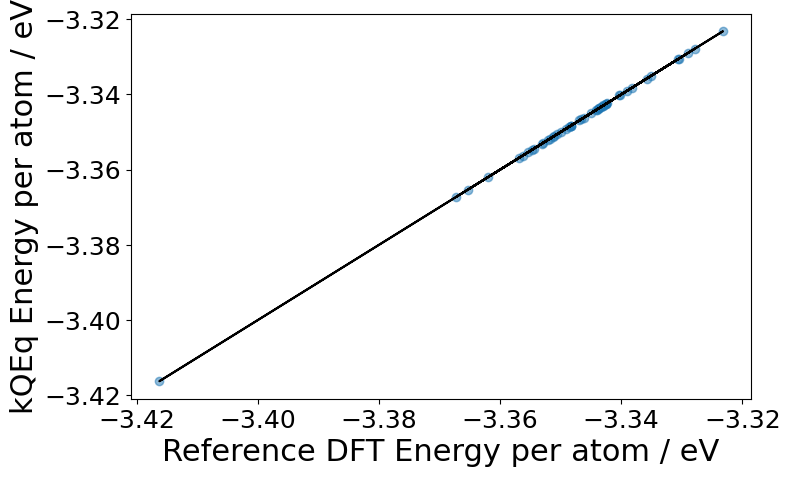

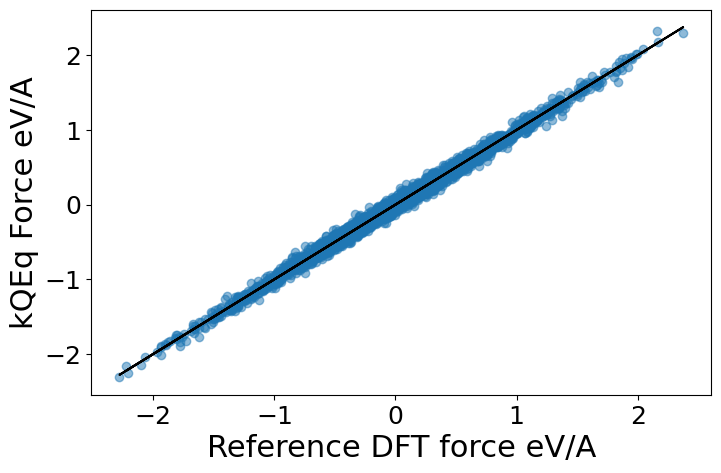

In [27]:
plot_basics(ref=ref_en_test,kqeq = E_test,preset="energy")
# plot_basics(ref=ref_q_test,kqeq = q_test,preset="charges")
plot_basics(ref=ref_f_test,kqeq = F_test,preset="forces")